In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("gmm_clusters.csv")

In [3]:
prePCA = pd.read_csv("prePCA.csv")

In [4]:
cols = df.columns.difference(['player', 'year', 'gmm_cluster'])

In [5]:
pop_means = df[cols].mean()
pop_sds = df[cols].std()

In [6]:
pop_means

arg_PC1      0.007506
long_PC1    -0.020286
ott_PC1      0.012723
putt_PC1     0.005463
short_PC1   -0.005406
dtype: float64

In [7]:
cluster_means = df.groupby("gmm_cluster")[cols].mean()

In [8]:
cluster_means

,arg_PC1,long_PC1,ott_PC1,putt_PC1,short_PC1
gmm_cluster,,,,,
0,1.017649,0.524474,-0.822744,-0.405953,-0.313427
1,-0.842002,-0.354128,0.279386,0.912920,0.003823
2,0.948286,-0.813706,0.628759,-0.405540,-0.357799
3,-0.634664,0.832387,-0.224259,-0.661518,0.688056


In [9]:
cluster_z = (cluster_means - pop_means) / pop_sds
cluster_z = cluster_z.round(2)
cluster_z

,arg_PC1,long_PC1,ott_PC1,putt_PC1,short_PC1
gmm_cluster,,,,,
0,0.97,0.62,-1.01,-0.44,-0.40
1,-0.82,-0.38,0.32,0.96,0.01
2,0.90,-0.91,0.75,-0.44,-0.46
3,-0.62,0.98,-0.29,-0.71,0.91


In [10]:
for c in cluster_z.index:
    print(f"\n=== Cluster {c} ===")
    
    zvals = cluster_z.loc[c].sort_values(ascending=False)

    strengths = zvals[zvals > 0]
    weaknesses = zvals[zvals < 0]

    print("\nTrue Strengths (z > 0):")
    if len(strengths) > 0:
        print(strengths.head(3))
    else:
        print("None (all features below population mean)")

    print("\nTrue Weaknesses (z < 0):")
    if len(weaknesses) > 0:
        print(weaknesses.tail(3))
    else:
        print("None (all features above population mean)")


=== Cluster 0 ===

True Strengths (z > 0):
arg_PC1     0.97
long_PC1    0.62
Name: 0, dtype: float64

True Weaknesses (z < 0):
short_PC1   -0.40
putt_PC1    -0.44
ott_PC1     -1.01
Name: 0, dtype: float64

=== Cluster 1 ===

True Strengths (z > 0):
putt_PC1     0.96
ott_PC1      0.32
short_PC1    0.01
Name: 1, dtype: float64

True Weaknesses (z < 0):
long_PC1   -0.38
arg_PC1    -0.82
Name: 1, dtype: float64

=== Cluster 2 ===

True Strengths (z > 0):
arg_PC1    0.90
ott_PC1    0.75
Name: 2, dtype: float64

True Weaknesses (z < 0):
putt_PC1    -0.44
short_PC1   -0.46
long_PC1    -0.91
Name: 2, dtype: float64

=== Cluster 3 ===

True Strengths (z > 0):
long_PC1     0.98
short_PC1    0.91
Name: 3, dtype: float64

True Weaknesses (z < 0):
ott_PC1    -0.29
arg_PC1    -0.62
putt_PC1   -0.71
Name: 3, dtype: float64


In [11]:
import scipy.stats as st

cluster_percentiles = cluster_z.applymap(lambda z: st.norm.cdf(z))
cluster_percentiles = (cluster_percentiles * 100).round(1)
cluster_percentiles

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_5367/723159363.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cluster_percentiles = cluster_z.applymap(lambda z: st.norm.cdf(z))


,arg_PC1,long_PC1,ott_PC1,putt_PC1,short_PC1
gmm_cluster,,,,,
0,83.4,73.2,15.6,33.0,34.5
1,20.6,35.2,62.6,83.1,50.4
2,81.6,18.1,77.3,33.0,32.3
3,26.8,83.6,38.6,23.9,81.9


In [12]:
prePCA.head()

,year,player,sg_total,birdie_or_better_percentage,bogey_avoidance,par_3_scoring_average,par_4_scoring_average,par_5_scoring_average,sg_off_the_tee,driving_distance,...,sg_putting,putting_average,one_putt_percentage,3_putt_avoidance___inside_5',3_putt_avoidance___5_10',3_putt_avoidance___10_15',3_putt_avoidance___15_20',3_putt_avoidance___20_25',3_putt_avoidance_>_25',average_distance_of_putts_made
0,2015,Aaron Baddeley,-0.223,0.2065,0.1637,2.99,4.10,4.57,-0.596,294.1,...,0.722,1.744,0.4272,0.0076,0.0046,0.0113,0.0141,0.0114,0.0662,79.416667
1,2015,Adam Hadwin,0.183,0.2013,0.1571,3.05,4.04,4.68,0.088,288.2,...,0.235,1.772,0.3793,0.0069,0.0039,0.0045,0.0058,0.0214,0.0886,78.166667
2,2015,Adam Scott,0.206,0.2153,0.1725,3.14,4.04,4.58,0.682,311.6,...,-0.396,1.806,0.3588,0.0236,0.0000,0.0247,0.0000,0.0408,0.1623,74.166667
3,2015,Alex Cejka,-0.217,0.2017,0.1552,3.04,4.03,4.67,-0.233,283.3,...,-0.232,1.765,0.3931,0.0000,0.0000,0.0090,0.0063,0.0238,0.1107,69.500000
4,2015,Alex Prugh,-0.004,0.2035,0.1604,3.03,4.06,4.61,0.319,295.2,...,-0.055,1.792,0.3389,0.0046,0.0000,0.0000,0.0071,0.0078,0.0904,66.083333


In [13]:
performance_col = "sg_total"

df = df.merge(
    prePCA[["player", "year", performance_col]],
    on=["player", "year"],
    how="left"
)




df.head()

,player,year,ott_PC1,long_PC1,short_PC1,arg_PC1,putt_PC1,gmm_cluster,sg_total
0,Aaron Baddeley,2015,-0.509809,0.388889,0.693153,0.927282,-1.499516,0,-0.223
1,Adam Hadwin,2015,-1.046071,-0.534898,1.552791,-0.308450,0.336628,1,0.183
2,Adam Scott,2015,0.389144,0.032519,-0.544679,-1.269520,1.392535,1,0.206
3,Alex Cejka,2015,-1.455240,0.247533,-0.507440,0.642349,1.072798,0,-0.217
4,Alex Prugh,2015,0.166195,0.003552,-0.363583,-1.285360,1.479197,1,-0.004


In [14]:
top_players_per_cluster = (
    df
    .sort_values(performance_col, ascending=False)
    .groupby(["year", "gmm_cluster"])
    .head(5)[["player", "year", performance_col, "gmm_cluster"]]
    .sort_values(["year", "gmm_cluster", performance_col], ascending=[True, True, False])
)

top_players_per_cluster[top_players_per_cluster["year"] == 2025]

,player,year,sg_total,gmm_cluster
2045,Tommy Fleetwood,2025,1.629,0
2015,Russell Henley,2025,1.317,0
1936,Harry Hall,2025,1.178,0
1935,Harris English,2025,0.616,0
1927,Denny McCarthy,2025,0.616,0
1883,Aaron Rai,2025,0.808,1
1965,Kevin Yu,2025,0.794,1
1998,Nicolai Højgaard,2025,0.715,1
2037,Taylor Pendrith,2025,0.664,1
2049,Victor Perez,2025,0.568,1


In [15]:
player_cluster_paths = (
    df
    .groupby("player")["gmm_cluster"]
    .unique()
)

player_cluster_paths.head()

player
Aaron Baddeley             [0]
Aaron Rai               [1, 2]
Aaron Wise              [1, 2]
Abraham Ancer     [3, 2, 1, 0]
Adam Hadwin       [1, 0, 2, 3]
Name: gmm_cluster, dtype: object

In [16]:
stable_players = player_cluster_paths[player_cluster_paths.apply(lambda x: len(x) == 1)]
stable_players

player
Aaron Baddeley               [0]
Adrien Dumont de Chassart    [1]
Aldrich Potgieter            [3]
Alejandro Tosti              [1]
Alex Prugh                   [1]
                            ... 
William Mouw                 [2]
Wilson Furr                  [1]
Zack Sucher                  [1]
Zecheng Dou                  [1]
Ángel Cabrera                [1]
Name: gmm_cluster, Length: 203, dtype: object

In [17]:
avg_sg = df.groupby("player")["sg_total"].mean()

stable_players_list = stable_players.index.tolist()

stable_with_sg = (
    avg_sg.loc[stable_players_list]
    .sort_values(ascending=False)
)

stable_with_sg

player
Rory McIlroy        1.650500
Tiger Woods         1.596000
Henrik Stenson      1.444667
Hideki Matsuyama    1.114545
Mito Pereira        1.111000
                      ...   
D.H. Lee           -1.778000
Erik Barnes        -1.868000
Raul Pereda        -1.879000
Andrew Yun         -1.936000
Brandon Matthews   -2.019000
Name: sg_total, Length: 203, dtype: float64

In [18]:
mover_counts = (
    df.groupby("player")["gmm_cluster"]
                   .nunique()
)

avg_sg = (
    df.groupby("player")["sg_total"]
                   .mean()
)
avg_sg.name = "avg_sg_total"

mover_summary = pd.concat([mover_counts, avg_sg], axis=1)
mover_summary.columns = ["num_clusters", "avg_sg_total"]

movers_only = mover_summary[mover_summary["num_clusters"] > 1]

movers_ranked = movers_only.sort_values(
    by=["num_clusters", "avg_sg_total"],
    ascending=[False, False]
)

movers_ranked.head(20)


,num_clusters,avg_sg_total
player,,
Tyrrell Hatton,4,1.118333
Tommy Fleetwood,4,1.068750
Sam Burns,4,0.830429
Rickie Fowler,4,0.819545
Russell Henley,4,0.800182
Billy Horschel,4,0.610100
Charles Howell III,4,0.554500
Phil Mickelson,4,0.455857
Abraham Ancer,4,0.397833


In [19]:
import scipy.stats as st

cluster_counts = df.groupby("player")["gmm_cluster"].nunique()

stable_players = cluster_counts[cluster_counts <= 2].index
movers_players  = cluster_counts[cluster_counts > 2].index

stable_sg = df[df["player"].isin(stable_players)]["sg_total"]
movers_sg = df[df["player"].isin(movers_players)]["sg_total"]

t_stat, p_value = st.ttest_ind(stable_sg, movers_sg, equal_var=False)  # Welch's t-test


print("===== Cluster Stability vs Movement: SG_total Comparison =====\n")

print(f"Stable players (N={len(stable_sg)}) mean SG = {stable_sg.mean():.3f}")
print(f"Movers  (N={len(movers_sg)}) mean SG = {movers_sg.mean():.3f}\n")

print(f"T-test (Welch): t = {t_stat:.3f}, p = {p_value:.6f}")

===== Cluster Stability vs Movement: SG_total Comparison =====

Stable players (N=1145) mean SG = 0.049
Movers  (N=913) mean SG = 0.251

T-test (Welch): t = -6.668, p = 0.000000


In [20]:
import matplotlib.pyplot as plt

def plot_player_path(player):
    df2 = df[df.player == player].sort_values("year")
    plt.plot(df2.year, df2.gmm_cluster, marker="o")
    plt.title(f"{player} — Cluster Trajectory")
    plt.xlabel("Year")
    plt.ylabel("Cluster")
    plt.yticks(sorted(df2.gmm_cluster.unique()))
    plt.grid(True)
    plt.show()

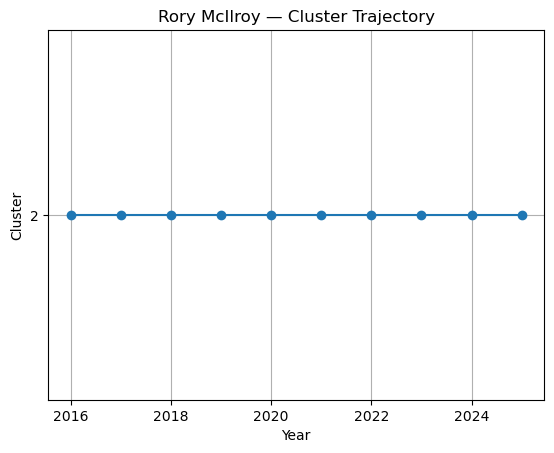

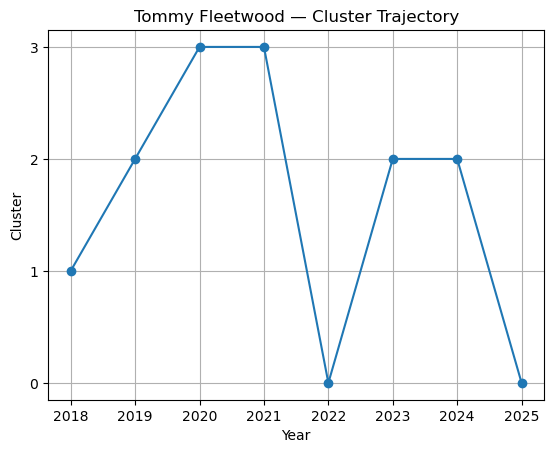

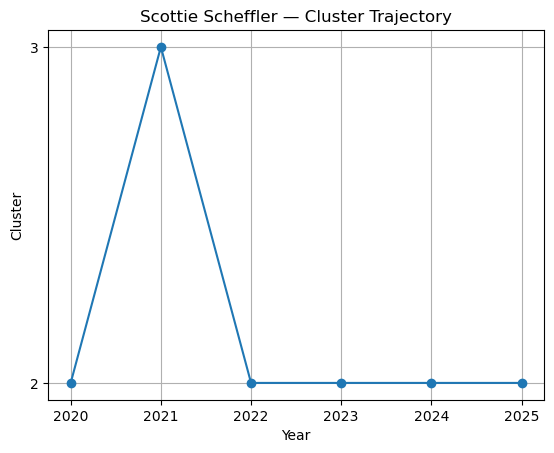

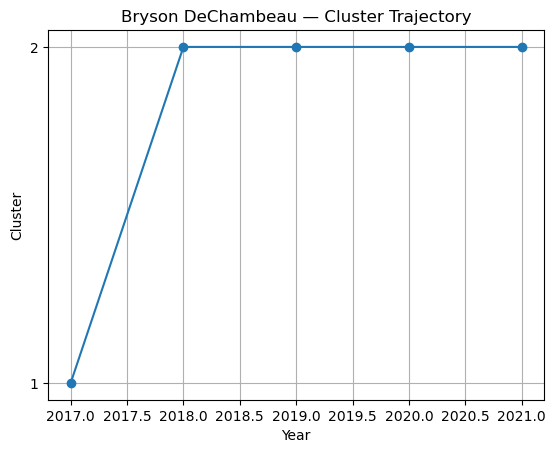

In [21]:
plot_player_path("Rory McIlroy")
plot_player_path("Tommy Fleetwood")
plot_player_path("Scottie Scheffler")
plot_player_path("Bryson DeChambeau")